In [70]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt

In [110]:
data = pd.read_csv('Data/preprocessed_data/group3_divided_df.csv')

data['Female'] = data['gender'].apply(lambda x: 1 if x == 1 else 0)
data['Male'] = data['gender'].apply(lambda x: 1 if x == 2 else 0)

actors_db_popularity = pd.read_csv('Data/preprocessed_data/actors_db.csv')[['name','popularity']]

# Merge actors_db_popularity with actors_tmdb by keeping only popularity from actors_db_popularity
data = pd.merge(actors_db_popularity, data, on='name', how='inner')

data = data.drop(columns=['gender','Unnamed: 0', 'gender','genres'])

# Keep only the year as a float from the date features (strings)
data['start_date_1'] = data['start_date_1'].apply(lambda x: x[:4] if x != 'nan' else np.nan)
data['start_date_2'] = data['start_date_2'].apply(lambda x: x[:4] if x != 'nan' else np.nan)
data['start_date_3'] = data['start_date_3'].apply(lambda x: x[:4] if x != 'nan' else np.nan)
data['end_date_1'] = data['end_date_1'].apply(lambda x: x[:4] if x != 'nan' else np.nan)
data['end_date_2'] = data['end_date_2'].apply(lambda x: x[:4] if x != 'nan' else np.nan)
data['end_date_3'] = data['end_date_3'].apply(lambda x: x[:4] if x != 'nan' else np.nan)

famous_actors = pd.read_csv('Data/preprocessed_data/famous_actors_db.csv')[['Actor Name','Popularity (%)']]
data_famous = pd.merge(data, famous_actors, left_on='name', right_on='Actor Name', how='inner').drop(columns=['Actor Name'])

data_famous

,name,popularity,career_length,number_of_movies,start_date_1,end_date_1,start_date_2,end_date_2,start_date_3,end_date_3,...,avg_order_2,std_order_0,std_order_1,std_order_2,avg_popularity_0,avg_popularity_1,avg_popularity_2,Female,Male,Popularity (%)
0,Gary Oldman,220.449,41,106,1982,1995,1995,2008,2008,2023,...,7.549020,2.886410,3.710063,13.811495,107.068231,105.160069,105.320902,0,1,68
1,Jackie Chan,156.714,61,180,1962,1982,1982,2002,2002,2023,...,4.666667,7.404026,4.676967,8.956686,99.361560,106.118375,114.133364,0,1,97
2,Nicolas Cage,141.980,43,128,1980,1994,1994,2008,2008,2023,...,2.171875,9.510867,15.274468,7.855242,90.524500,95.893400,95.708656,0,1,95
3,Kevin Costner,133.838,40,91,1981,1993,1993,2006,2006,2021,...,6.647059,15.392819,4.710843,18.891147,96.673733,97.083778,94.958912,0,1,92
4,Matthew Perry,94.124,61,29,1961,1981,1981,2001,2001,2022,...,2.000000,0.000000,13.136065,2.000000,0.600000,73.077923,57.116600,0,1,89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
443,Tom Wilkinson,14.585,45,99,1976,1991,1991,2006,2006,2021,...,5.431818,14.418193,14.837501,8.935114,16.152364,15.557791,15.407227,0,1,58
444,Sally Kirkland,14.442,62,153,1961,1981,1981,2001,2001,2023,...,6.553846,14.178454,9.887945,18.833710,9.468171,9.142736,9.350462,1,0,53
445,Daniel Day-Lewis,14.390,46,34,1971,1986,1986,2001,2001,2017,...,11.285714,21.824779,0.616575,24.108175,12.489222,13.678455,12.196071,0,1,79
446,John Belushi,14.221,47,33,1973,1988,1988,2003,2003,2020,...,15.333333,2.966651,6.904598,26.668750,13.155000,12.629429,12.677417,0,1,85


In [123]:
# Replace the nan values with -1
data_famous = data_famous.fillna(-1)


In [124]:
# Split data into train and test
from sklearn.model_selection import train_test_split
train, test = train_test_split(data_famous, test_size=0.2, random_state=42)

# Split data into X and y
X_train = train.drop(['Popularity (%)','name'], axis=1)
y_train = train['Popularity (%)']
X_test = test.drop(['Popularity (%)','name'], axis=1)
y_test = test['Popularity (%)']

In [125]:
# Normalize data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [126]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,0.382119,0.042857,0.288248,0.957746,0.96,0.96,0.965517,0.965517,0.954545,0.198276,...,0.138298,0.106705,0.146199,0.182808,0.314158,0.601980,0.660709,0.617409,0.0,1.0
1,0.219564,0.085714,0.365854,0.915493,0.92,0.92,0.931034,0.931034,0.954545,0.387931,...,0.088718,0.037321,0.160084,0.068304,0.073072,0.269445,0.291084,0.209402,0.0,1.0
2,0.121876,0.114286,0.159645,0.859155,0.86,0.86,0.862069,0.862069,0.863636,0.293103,...,0.062890,0.033462,0.151863,0.080535,0.051523,0.110022,0.120776,0.061391,0.0,1.0
3,0.087047,0.085714,0.177384,0.915493,0.92,0.92,0.931034,0.931034,0.954545,0.129310,...,0.075581,0.050962,0.078678,0.071470,0.090662,0.122857,0.151931,0.119352,0.0,1.0
4,0.289769,0.128571,0.148559,0.873239,0.88,0.88,0.862069,0.862069,0.954545,0.155172,...,0.239423,0.180507,0.788954,0.283680,0.373910,0.252612,0.282373,0.213348,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,0.173224,0.585714,1.000000,0.436620,0.48,0.48,0.586207,0.586207,1.000000,0.034483,...,0.122279,0.025113,0.094040,0.284391,0.051425,0.001859,0.276214,0.222875,0.0,1.0
354,0.077268,0.114286,0.141907,0.774648,0.72,0.72,0.620690,0.620690,0.590909,0.181034,...,0.065705,0.095280,0.072371,0.051575,0.171507,0.212369,0.220563,0.168174,0.0,1.0
355,0.046452,0.028571,0.075388,0.957746,0.96,0.96,0.965517,0.965517,0.909091,0.077586,...,0.067639,0.030769,0.030360,0.056936,0.042564,0.216878,0.217692,0.183462,1.0,0.0
356,0.011006,0.714286,0.270510,0.281690,0.32,0.32,0.413793,0.413793,0.909091,0.689655,...,0.460165,0.231868,0.116718,0.394195,0.323427,0.112491,0.132618,0.071637,0.0,1.0


In [127]:
# Find best parameters
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR, LinearSVR, NuSVR

parameters = {'kernel':('linear', 'rbf', 'poly'), 'C':np.linspace(0.1, 10, 20), 'epsilon':np.linspace(0.1, 10, 20)}
svr = SVR()
clf = GridSearchCV(svr, parameters)
clf.fit(X_train, y_train)
best = clf.best_params_
print(best)

# best = {'C': 10, 'epsilon': 0.1, 'kernel': 'poly'}
# best = {'C': 3.2263157894736847, 'epsilon': 8.957894736842105, 'kernel': 'poly'}


# Apply SVR with best parameters
svr = SVR(kernel=best['kernel'], C=best['C'], epsilon=best['epsilon'])
svr.fit(X_train, y_train)

# Predict
pred = svr.predict(X_test)

{'C': 6.352631578947369, 'epsilon': 10.0, 'kernel': 'poly'}


RMSE:  13.590821813445388
R2:  0.10909720003461654
Accuracy:  0.7888888888888889


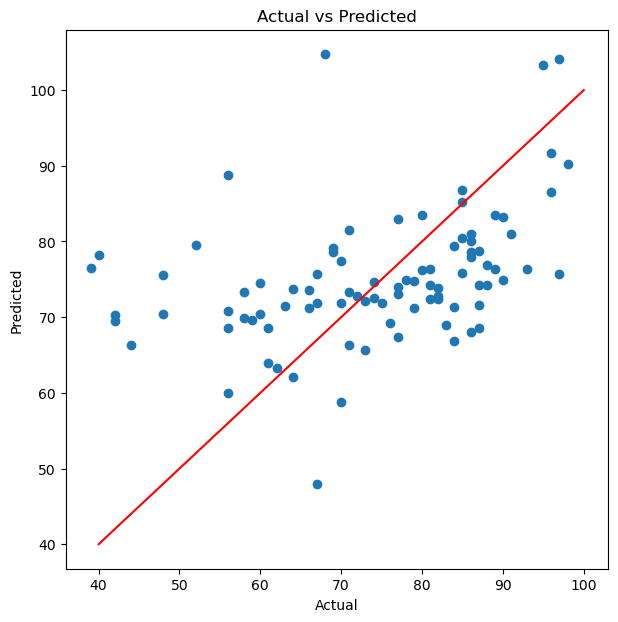

In [128]:
# Evaluate
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, pred))
print('RMSE: ', rmse)

# R2
def r2(y_test, pred):
    y_mean = np.mean(y_test)
    ss_tot = np.sum((y_test - y_mean)**2)
    ss_res = np.sum((y_test - pred)**2)
    return 1 - (ss_res/ss_tot)

print('R2: ', r2(y_test, pred))

# Compute the accuracy with a threshold of 15%
df = pd.DataFrame({'Actual': y_test, 'Predicted': pred})
df['Accuracy'] = df.apply(lambda row: 1 if abs(row['Predicted'] - row['Actual']) <= 15 else 0, axis=1)
accuracy = df['Accuracy'].sum() / len(df)
print('Accuracy: ', accuracy)


# Plot
plt.figure(figsize=(7,7))
plt.scatter(y_test, pred)
plt.plot([40,100],[40,100], color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')

plt.show()

In [129]:
# Display the true and predicted scores in a dataframe
display(df)

,Actual,Predicted,Accuracy
285,59,69.579034,1
296,77,73.067007,1
117,64,73.732669,1
346,64,62.059739,1
70,87,78.680969,1
...,...,...,...
439,71,66.378232,1
367,66,73.557181,1
57,96,86.584280,1
429,97,75.757418,0


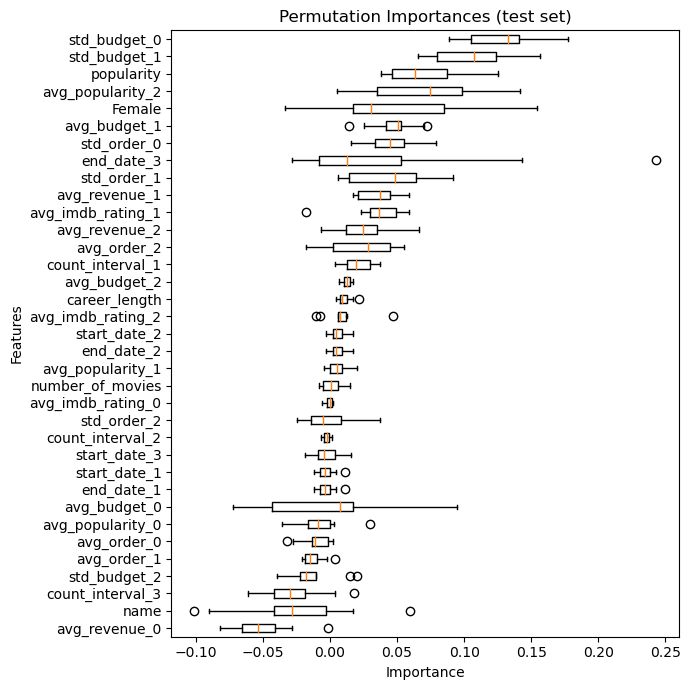

In [130]:
# Explain the model
from sklearn.inspection import permutation_importance
result = permutation_importance(svr, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1)
sorted_idx = result.importances_mean.argsort()


fig, ax = plt.subplots(figsize=(7,7))
ax.boxplot(result.importances[sorted_idx].T, vert=False, labels=data.columns[sorted_idx])
ax.set_title("Permutation Importances (test set)")
ax.set_xlabel("Importance")
ax.set_ylabel("Features")
fig.tight_layout()

plt.show()

In [131]:
# Apply SVR with best parameters on complete data
X = data_famous.drop(['Popularity (%)','name'], axis=1)
y = data_famous['Popularity (%)']

# Normalize data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X = scaler.fit_transform(X)

# Apply SVR with best parameters
svr = SVR(kernel=best['kernel'], C=best['C'], epsilon=best['epsilon'])
svr.fit(X, y)

SVR(C=6.352631578947369, epsilon=10.0, kernel='poly')

The number of movies played has the bigger influence on predictingg the fame, followed by the popularity and the average budget movie budget of the beginning of his career

In [132]:
# Construct df with actors from tmdb that are not in famous_actors
data_not_famous = data[~data['name'].isin(famous_actors['Actor Name'])]

# Remove all actors containing Animation in their genre
actors_genres = pd.read_csv('Data/preprocessed_data/actor_genre.csv')[['name','genre_mean_weighted','genre_mean']]
actors_genres = actors_genres[~actors_genres['genre_mean_weighted'].str.contains('Animation')]
actors_genres = actors_genres[~actors_genres['genre_mean'].str.contains('Animation')]
actors_genres = actors_genres['name']
# Merge actors_genres with data_not_famous
data_not_famous = pd.merge(actors_genres, data_not_famous, on='name', how='inner')

data_not_famous

,name,popularity,career_length,number_of_movies,start_date_1,end_date_1,start_date_2,end_date_2,start_date_3,end_date_3,...,avg_order_1,avg_order_2,std_order_0,std_order_1,std_order_2,avg_popularity_0,avg_popularity_1,avg_popularity_2,Female,Male
0,Angela White,87.223,66,12,1957,1979,1979,2001,2001,2023,...,22.000000,14.000000,11.412274,1.000000,7.949843,1.376000,28.019000,52.740200,0,0
1,Clancy Brown,63.462,40,122,1983,1996,1996,2009,2009,2023,...,5.023810,6.482143,3.802183,5.938126,7.755162,53.080833,50.873643,52.648214,0,1
2,Gina Gershon,63.451,42,95,1981,1995,1995,2009,2009,2023,...,4.947368,7.368421,8.356993,6.688353,10.209441,39.435211,39.968737,41.285895,1,0
3,Colleen Camp,54.123,50,118,1973,1989,1989,2005,2005,2023,...,11.432432,13.090909,5.767469,10.761645,18.300296,44.738541,44.420784,43.467364,1,0
4,Scott Glenn,52.131,53,89,1970,1987,1987,2004,2004,2023,...,3.711111,3.818182,3.862137,8.402704,2.854603,34.102000,34.748444,32.703091,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1214,John Shea,14.135,44,48,1978,1992,1992,2006,2006,2022,...,4.384615,4.642857,1.675487,6.978411,2.793031,11.917714,10.944385,10.273071,0,1
1215,Michael Maloney,14.134,41,50,1980,1993,1993,2006,2006,2021,...,5.944444,7.222222,6.899053,4.789714,6.511149,8.394857,7.623056,9.914000,0,1
1216,Peter Cullen,14.133,53,70,1970,1987,1987,2004,2004,2023,...,5.120000,19.952381,9.562296,6.831222,29.062291,11.245583,11.743640,11.921143,0,1
1217,Mary Crosby,14.133,50,31,1970,1986,1986,2002,2002,2020,...,3.285714,7.500000,4.679832,2.839230,3.862210,10.218364,10.333000,11.144667,1,0


In [133]:
data_not_famous.columns

Index(['name', 'popularity', 'career_length', 'number_of_movies',
       'start_date_1', 'end_date_1', 'start_date_2', 'end_date_2',
       'start_date_3', 'end_date_3', 'count_interval_1', 'count_interval_2',
       'count_interval_3', 'avg_budget_0', 'avg_budget_1', 'avg_budget_2',
       'std_budget_0', 'std_budget_1', 'std_budget_2', 'avg_revenue_0',
       'avg_revenue_1', 'avg_revenue_2', 'avg_imdb_rating_0',
       'avg_imdb_rating_1', 'avg_imdb_rating_2', 'avg_order_0', 'avg_order_1',
       'avg_order_2', 'std_order_0', 'std_order_1', 'std_order_2',
       'avg_popularity_0', 'avg_popularity_1', 'avg_popularity_2', 'Female',
       'Male'],
      dtype='object')

In [135]:
# Now we can predict the fame of actors that are not in famous_actors
X_not_famous = data_not_famous.drop(['name'], axis=1).fillna(-1)
X_not_famous = scaler.transform(X_not_famous)
pred_not_famous = svr.predict(X_not_famous)

# Add the predicted fame to data_not_famous
data_not_famous.loc[:,'Popularity (%)'] = pred_not_famous
data_not_famous.sort_values(by='Popularity (%)', ascending=False, inplace=True)
data_not_famous.reset_index(inplace=True,drop=True)

# Remove all actors with a predicted fame higher than 99%
data_not_famous = data_not_famous[data_not_famous['Popularity (%)'] <= 99]

display(data_not_famous)

,name,popularity,career_length,number_of_movies,start_date_1,end_date_1,start_date_2,end_date_2,start_date_3,end_date_3,...,avg_order_2,std_order_0,std_order_1,std_order_2,avg_popularity_0,avg_popularity_1,avg_popularity_2,Female,Male,Popularity (%)
0,Priscilla Presley,20.754,42,19,1981,1995,1995,2009,2009,2023,...,10.571429,62.954470,6.493073,11.017611,19.765286,19.437400,19.347286,1,0,89.442509
1,Leslie Uggams,18.068,61,22,1962,1982,1982,2002,2002,2023,...,15.555556,18.350749,85.147871,25.100293,15.239500,13.653600,17.142667,1,0,87.692962
2,Bette Midler,23.960,57,75,1966,1985,1985,2004,2004,2023,...,16.344828,27.556713,18.686742,40.459666,23.073000,26.765062,23.509138,1,0,86.024697
3,Laraine Newman,16.440,47,106,1976,1991,1991,2006,2006,2023,...,22.689655,29.373349,20.939655,16.758124,9.882667,10.509259,11.137828,1,0,85.783719
4,Karen Allen,24.774,45,64,1978,1993,1993,2008,2008,2023,...,4.400000,57.449811,3.184912,2.961981,24.431769,25.630087,24.998133,1,0,85.567605
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1214,Robert Foxworth,23.495,43,37,1971,1985,1985,1999,1999,2014,...,36.444444,5.325411,2.758510,34.644580,13.418500,13.965500,12.845667,0,1,53.398171
1215,Elya Baskin,26.656,49,46,1972,1988,1988,2004,2004,2021,...,10.529412,14.523907,11.687410,11.381707,13.383857,13.619333,13.695588,0,1,52.603695
1216,Christopher Fairbank,15.369,44,50,1979,1993,1993,2007,2007,2023,...,12.913043,6.030958,5.808877,16.468450,10.573000,10.935500,11.381043,0,1,51.788124
1217,Warwick Davis,16.550,41,60,1982,1994,1994,2007,2007,2023,...,15.640000,13.171940,9.936661,16.993834,10.798000,10.742783,10.561800,0,1,45.906562


In [136]:
data_famous

,name,popularity,career_length,number_of_movies,start_date_1,end_date_1,start_date_2,end_date_2,start_date_3,end_date_3,...,avg_order_2,std_order_0,std_order_1,std_order_2,avg_popularity_0,avg_popularity_1,avg_popularity_2,Female,Male,Popularity (%)
0,Gary Oldman,220.449,41,106,1982,1995,1995,2008,2008,2023,...,7.549020,2.886410,3.710063,13.811495,107.068231,105.160069,105.320902,0,1,68
1,Jackie Chan,156.714,61,180,1962,1982,1982,2002,2002,2023,...,4.666667,7.404026,4.676967,8.956686,99.361560,106.118375,114.133364,0,1,97
2,Nicolas Cage,141.980,43,128,1980,1994,1994,2008,2008,2023,...,2.171875,9.510867,15.274468,7.855242,90.524500,95.893400,95.708656,0,1,95
3,Kevin Costner,133.838,40,91,1981,1993,1993,2006,2006,2021,...,6.647059,15.392819,4.710843,18.891147,96.673733,97.083778,94.958912,0,1,92
4,Matthew Perry,94.124,61,29,1961,1981,1981,2001,2001,2022,...,2.000000,0.000000,13.136065,2.000000,0.600000,73.077923,57.116600,0,1,89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
443,Tom Wilkinson,14.585,45,99,1976,1991,1991,2006,2006,2021,...,5.431818,14.418193,14.837501,8.935114,16.152364,15.557791,15.407227,0,1,58
444,Sally Kirkland,14.442,62,153,1961,1981,1981,2001,2001,2023,...,6.553846,14.178454,9.887945,18.833710,9.468171,9.142736,9.350462,1,0,53
445,Daniel Day-Lewis,14.390,46,34,1971,1986,1986,2001,2001,2017,...,11.285714,21.824779,0.616575,24.108175,12.489222,13.678455,12.196071,0,1,79
446,John Belushi,14.221,47,33,1973,1988,1988,2003,2003,2020,...,15.333333,2.966651,6.904598,26.668750,13.155000,12.629429,12.677417,0,1,85


In [137]:
# Combine data_not_famous with data_famous and sort by fame
data_final = pd.concat([data_famous, data_not_famous]).drop(['Female','Male'], axis=1)
data_final.sort_values(by=['Popularity (%)'], ascending=False, inplace=True)
data_final.reset_index(inplace=True, drop=True)
data_final

,name,popularity,career_length,number_of_movies,start_date_1,end_date_1,start_date_2,end_date_2,start_date_3,end_date_3,...,avg_order_0,avg_order_1,avg_order_2,std_order_0,std_order_1,std_order_2,avg_popularity_0,avg_popularity_1,avg_popularity_2,Popularity (%)
0,Jim Carrey,43.590,42,82,1981,1994,1994,2008,2008,2023,...,5.190476,4.931034,9.000000,7.762051,11.682380,15.801503,34.975190,35.209621,36.543875,98.0
1,Morgan Freeman,91.283,59,180,1964,1983,1983,2002,2002,2023,...,6.500000,5.340426,5.403361,5.395104,10.768900,15.682415,108.606143,100.502362,103.315185,98.0
2,Denzel Washington,77.941,46,76,1977,1992,1992,2007,2007,2023,...,1.750000,4.483871,12.560000,2.754542,12.641128,47.650461,72.316200,74.956258,72.882200,97.0
3,Whoopi Goldberg,36.576,41,216,1982,1994,1994,2007,2007,2023,...,8.226415,7.512500,7.707317,15.863381,13.464763,8.567505,27.726302,29.466550,26.559500,97.0
4,Marilyn Monroe,16.013,75,86,1947,1971,1971,1996,1996,2022,...,8.324324,19.500000,16.212121,16.865211,25.387005,18.992435,14.266108,13.449750,14.707788,97.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1662,Demián Bichir,18.887,40,64,1983,1996,1996,2009,2009,2023,...,4.750000,1.631579,4.454545,3.319764,1.925194,8.662321,10.622500,13.283737,14.398000,40.0
1663,Tobin Bell,31.944,44,75,1979,1993,1993,2007,2007,2023,...,25.533333,3.724138,2.129032,29.197869,3.182891,2.720791,38.666467,35.306517,34.876613,40.0
1664,Mercedes McCambridge,15.159,74,27,1949,1973,1973,1997,1997,2023,...,4.800000,12.800000,12.000000,6.046487,8.328265,4.000000,12.398100,14.023800,15.822000,39.0
1665,Jacki Weaver,30.360,53,54,1970,1987,1987,2004,2004,2023,...,2.714286,4.000000,3.815789,3.574285,2.000000,3.530732,20.787500,22.492000,19.190868,38.0


In [138]:
data_famous.sort_values(by=['Popularity (%)'], ascending=False, inplace=True)
data_famous

,name,popularity,career_length,number_of_movies,start_date_1,end_date_1,start_date_2,end_date_2,start_date_3,end_date_3,...,avg_order_2,std_order_0,std_order_1,std_order_2,avg_popularity_0,avg_popularity_1,avg_popularity_2,Female,Male,Popularity (%)
72,Jim Carrey,43.590,42,82,1981,1994,1994,2008,2008,2023,...,9.000000,7.762051,11.682380,15.801503,34.975190,35.209621,36.543875,0,1,98
5,Morgan Freeman,91.283,59,180,1964,1983,1983,2002,2002,2023,...,5.403361,5.395104,10.768900,15.682415,108.606143,100.502362,103.315185,0,1,98
96,Bruce Lee,40.491,82,63,1941,1968,1968,1995,1995,2023,...,5.280000,1.479020,2.777765,11.625902,23.616250,24.741385,26.068520,0,1,97
28,Tom Cruise,56.208,42,86,1981,1995,1995,2009,2009,2023,...,15.121212,7.970414,8.073014,36.535377,39.668200,45.846576,46.460909,0,1,97
124,Whoopi Goldberg,36.576,41,216,1982,1994,1994,2007,2007,2023,...,7.707317,15.863381,13.464763,8.567505,27.726302,29.466550,26.559500,1,0,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,Tobin Bell,31.944,44,75,1979,1993,1993,2007,2007,2023,...,2.129032,29.197869,3.182891,2.720791,38.666467,35.306517,34.876613,0,1,40
385,Demián Bichir,18.887,40,64,1983,1996,1996,2009,2009,2023,...,4.454545,3.319764,1.925194,8.662321,10.622500,13.283737,14.398000,0,1,40
441,Mercedes McCambridge,15.159,74,27,1949,1973,1973,1997,1997,2023,...,12.000000,6.046487,8.328265,4.000000,12.398100,14.023800,15.822000,1,0,39
191,Jacki Weaver,30.360,53,54,1970,1987,1987,2004,2004,2023,...,3.815789,3.574285,2.000000,3.530732,20.787500,22.492000,19.190868,1,0,38


In [139]:
# Save data_final
data_final.to_csv('Data/preprocessed_data/final_data/actors_with_fame_40.csv', index=False)

In [50]:
# We now load them all back and combine them

# Load data
actors_20 = pd.read_csv('Data/preprocessed_data/final_data/actors_with_fame_0_20.csv')
actors_20_40 = pd.read_csv('Data/preprocessed_data/final_data/actors_with_fame_20_40.csv')
actors_40 = pd.read_csv('Data/preprocessed_data/final_data/actors_with_fame_40.csv')

# Combine them
actors = pd.concat([actors_20, actors_20_40, actors_40])

actors

,name,popularity,career_length,number_of_movies,avg_revenue_0,avg_budget_0,std_budget_0,avg_imdb_rating_0,avg_order_0,std_order_0,...,start_date_3,end_date_3,count_interval_3,avg_budget_2,std_budget_2,avg_revenue_2,avg_imdb_rating_2,avg_order_2,std_order_2,avg_popularity_2
0,Jennifer Lawrence,61.082,15,39,1.573118e+08,4.643974e+07,6.646270e+07,6.715385,1.820513,2.687786,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Channing Tatum,58.692,18,50,1.327904e+08,4.607600e+07,4.711648e+07,6.392000,8.100000,15.922625,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Larry the Cable Guy,36.933,18,44,3.317641e+07,1.271932e+07,4.270589e+07,5.956818,4.545455,21.626430,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Jaden Smith,28.473,16,17,7.366708e+07,1.888235e+07,3.600798e+07,6.176471,6.235294,9.502504,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Zac Efron,38.964,19,43,5.652896e+07,1.754070e+07,2.534356e+07,6.344186,2.418605,5.751572,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1662,Demián Bichir,18.887,40,64,1.864653e+07,8.969416e+06,5.194012e+06,6.158333,4.750000,3.319764,...,2009.0,2023.0,33.0,2.685138e+07,3.960577e+07,6.234736e+07,6.178788,4.454545,8.662321,14.398000
1663,Tobin Bell,31.944,44,75,3.972182e+07,1.077638e+07,6.597873e+06,6.546667,25.533333,29.197869,...,2007.0,2023.0,31.0,4.640231e+06,4.150385e+06,3.156803e+07,5.309677,2.129032,2.720791,34.876613
1664,Mercedes McCambridge,15.159,74,27,1.787447e+07,2.215678e+06,1.234124e+06,6.315000,4.800000,6.046487,...,1997.0,2023.0,2.0,6.092333e+06,5.907667e+06,9.533333e+04,7.150000,12.000000,4.000000,15.822000
1665,Jacki Weaver,30.360,53,54,8.887986e+06,4.144643e+06,1.033045e+06,6.485714,2.714286,3.574285,...,2004.0,2023.0,38.0,9.180592e+06,8.685528e+06,2.287284e+07,6.255263,3.815789,3.530732,19.190868


In [ ]:
# save actors
actors.to_csv('Data/preprocessed_data/final_data/actors_final.csv', index=False)

In [80]:
full = pd.read_csv('Data/preprocessed_data/final_data/full_db.csv')
full

,name,gender,career_length,number_of_movies,avg_revenue_0,avg_budget_0,std_budget_0,avg_imdb_rating_0,avg_order_0,std_order_0,...,avg_budget_2,std_budget_2,avg_revenue_2,avg_imdb_rating_2,avg_order_2,std_order_2,avg_popularity_2,n_genres_2,main_genre_2,success
0,Jennifer Lawrence,1,15,39,1.573118e+08,4.643974e+07,6.646270e+07,6.715385,1.820513,2.687786,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.742864
1,Channing Tatum,2,18,50,1.327904e+08,4.607600e+07,4.711648e+07,6.392000,8.100000,15.922625,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.275160
2,Larry the Cable Guy,2,18,44,3.317641e+07,1.271932e+07,4.270589e+07,5.956818,4.545455,21.626430,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.048109
3,Jaden Smith,2,16,17,7.366708e+07,1.888235e+07,3.600798e+07,6.176471,6.235294,9.502504,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.012647
4,Zac Efron,2,19,43,5.652896e+07,1.754070e+07,2.534356e+07,6.344186,2.418605,5.751572,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.015389
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6709,Demián Bichir,2,40,64,1.864653e+07,8.969416e+06,5.194012e+06,6.158333,4.750000,3.319764,...,2.685138e+07,3.960577e+07,6.234736e+07,6.178788,4.454545,8.662321,14.398000,16.0,Drama,0.547791
6710,Tobin Bell,2,44,75,3.972182e+07,1.077638e+07,6.597873e+06,6.546667,25.533333,29.197869,...,4.640231e+06,4.150385e+06,3.156803e+07,5.309677,2.129032,2.720791,34.876613,12.0,Horror,0.529894
6711,Mercedes McCambridge,1,74,27,1.787447e+07,2.215678e+06,1.234124e+06,6.315000,4.800000,6.046487,...,6.092333e+06,5.907667e+06,9.533333e+04,7.150000,12.000000,4.000000,15.822000,3.0,Drama,0.646331
6712,Jacki Weaver,1,53,54,8.887986e+06,4.144643e+06,1.033045e+06,6.485714,2.714286,3.574285,...,9.180592e+06,8.685528e+06,2.287284e+07,6.255263,3.815789,3.530732,19.190868,15.0,Drama,0.700873


In [81]:
portion_complete = pd.read_csv('Data/preprocessed_data/final_data/merged_grouped_actors_db.csv')

portion_complete = portion_complete[['name','avg_scaled_portion_0','avg_scaled_portion_1','avg_scaled_portion_2','std_scaled_portion_0','std_scaled_portion_1','std_scaled_portion_2']]

portion_complete.columns

Index(['name', 'avg_scaled_portion_0', 'avg_scaled_portion_1',
       'avg_scaled_portion_2', 'std_scaled_portion_0', 'std_scaled_portion_1',
       'std_scaled_portion_2'],
      dtype='object')

In [82]:
# merges full with portion_complete

full = pd.merge(full, portion_complete, on='name', how='inner')
full

,name,gender,career_length,number_of_movies,avg_revenue_0,avg_budget_0,std_budget_0,avg_imdb_rating_0,avg_order_0,std_order_0,...,avg_popularity_2,n_genres_2,main_genre_2,success,avg_scaled_portion_0,avg_scaled_portion_1,avg_scaled_portion_2,std_scaled_portion_0,std_scaled_portion_1,std_scaled_portion_2
0,Jennifer Lawrence,1,15,39,1.573118e+08,4.643974e+07,6.646270e+07,6.715385,1.820513,2.687786,...,NaN,NaN,NaN,1.742864,5.204110,NaN,NaN,NaN,NaN,NaN
1,Channing Tatum,2,18,50,1.327904e+08,4.607600e+07,4.711648e+07,6.392000,8.100000,15.922625,...,NaN,NaN,NaN,1.275160,7.775922,NaN,NaN,NaN,NaN,NaN
2,Larry the Cable Guy,2,18,44,3.317641e+07,1.271932e+07,4.270589e+07,5.956818,4.545455,21.626430,...,NaN,NaN,NaN,1.048109,4.450932,NaN,NaN,NaN,NaN,NaN
3,Jaden Smith,2,16,17,7.366708e+07,1.888235e+07,3.600798e+07,6.176471,6.235294,9.502504,...,NaN,NaN,NaN,1.012647,6.987304,NaN,NaN,NaN,NaN,NaN
4,Zac Efron,2,19,43,5.652896e+07,1.754070e+07,2.534356e+07,6.344186,2.418605,5.751572,...,NaN,NaN,NaN,1.015389,7.616601,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6709,Demián Bichir,2,40,64,1.864653e+07,8.969416e+06,5.194012e+06,6.158333,4.750000,3.319764,...,14.398000,16.0,Drama,0.547791,1.663401,4.011755,4.720681,0.702306,9.490752,12.334082
6710,Tobin Bell,2,44,75,3.972182e+07,1.077638e+07,6.597873e+06,6.546667,25.533333,29.197869,...,34.876613,12.0,Horror,0.529894,0.928570,3.576856,3.846597,0.633373,7.816844,6.722994
6711,Mercedes McCambridge,1,74,27,1.787447e+07,2.215678e+06,1.234124e+06,6.315000,4.800000,6.046487,...,15.822000,3.0,Drama,0.646331,3.081314,1.017655,1.244818,2.888662,0.765983,0.235679
6712,Jacki Weaver,1,53,54,8.887986e+06,4.144643e+06,1.033045e+06,6.485714,2.714286,3.574285,...,19.190868,15.0,Drama,0.700873,3.091080,1.742332,2.129550,3.466096,0.231225,1.913316


In [83]:
# export to csv
full.to_csv('Data/preprocessed_data/final_data/full_db.csv', index=False)